<a href="https://colab.research.google.com/github/qmohsu/unperturbed_satellite_orbit_simulation/blob/main/demonstration_non_spherical_nature_of_the_earth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Visualizing Earth's oblateness comparison...
Real Earth flattening: 0.00335281 (1/298.3)
Exaggerated flattening: 0.335281 (100x real)


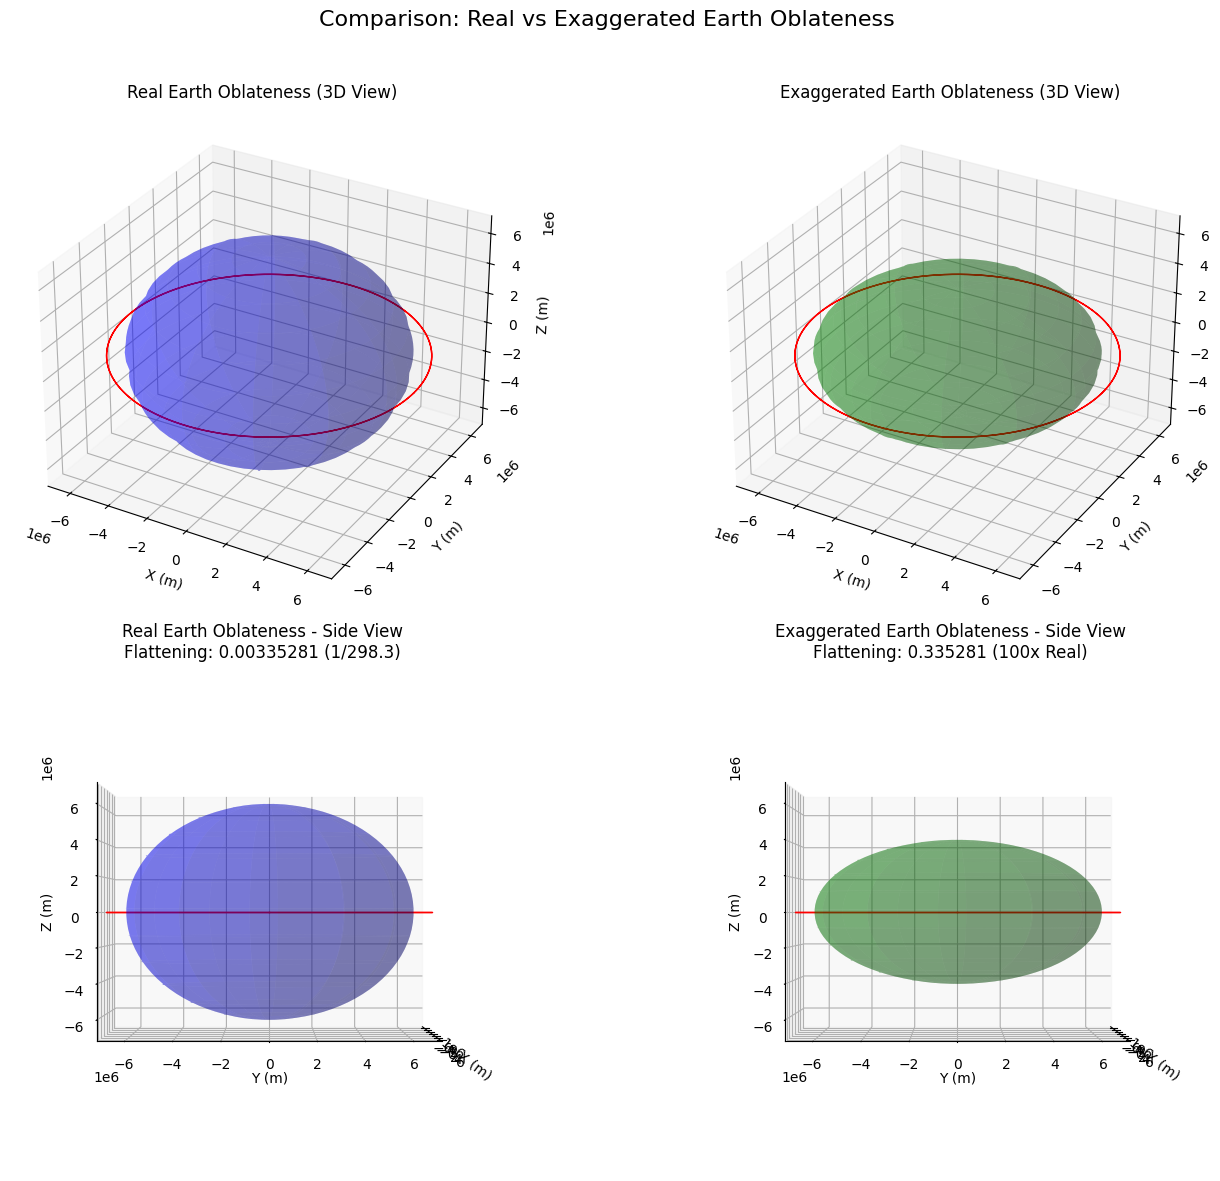

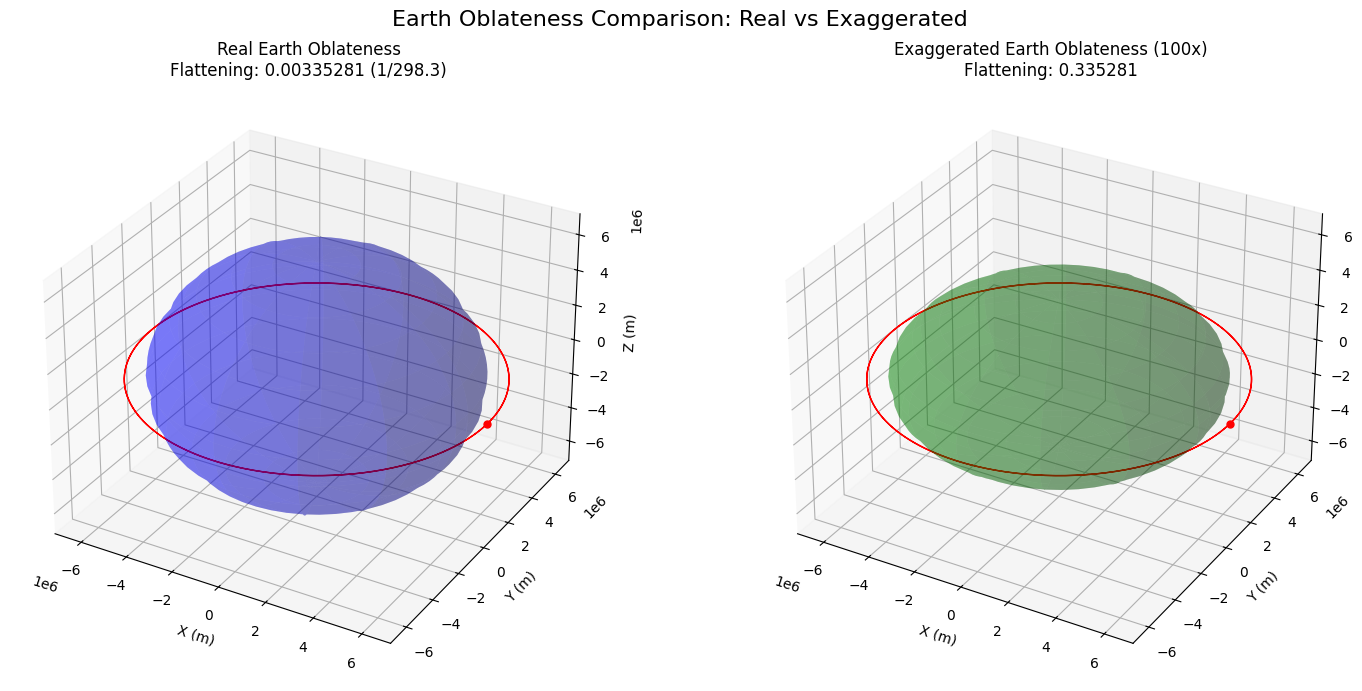

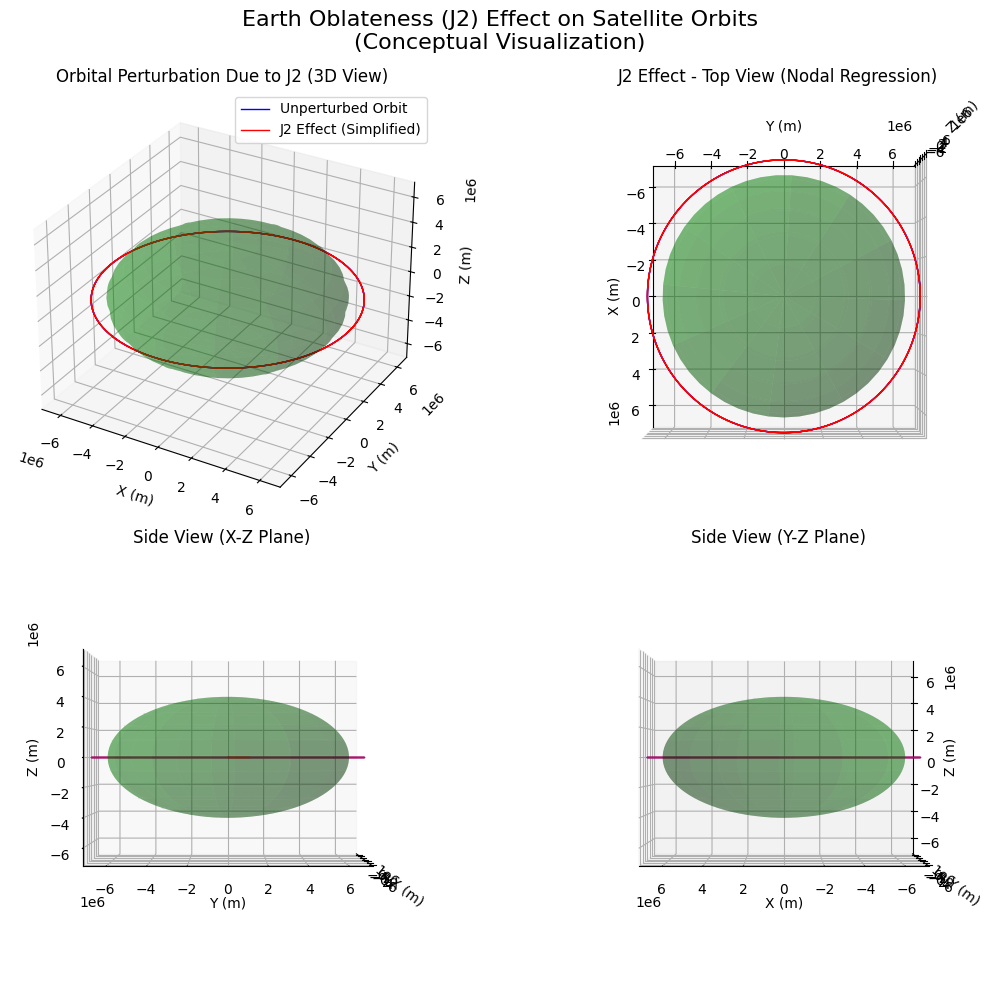

In [6]:
"""
Unperturbed Satellite Orbit Simulation with Earth Oblateness Comparison
Based on: https://github.com/qmohsu/unperturbed_satellite_orbit_simulation

This enhanced version compares the real Earth's oblateness with an exaggerated version
to better illustrate the non-spherical nature of Earth.
"""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Constants
G = 6.67430e-11  # Gravitational constant (m^3/kg/s^2)
M = 5.97219e24   # Earth's mass (kg)
R = 6371000      # Earth's mean radius (m)
mu = G * M       # Standard gravitational parameter

# Earth's real flattening (f = 1/298.257223563)
REAL_FLATTENING = 1/298.257223563  # Real Earth flattening
EXAGGERATION_FACTOR = 100  # How much to exaggerate the flattening

# Define the differential equations for the satellite's motion
def orbital_motion(t, y):
    # y contains [rx, ry, rz, vx, vy, vz]
    rx, ry, rz, vx, vy, vz = y

    # Distance from center of Earth
    r = np.sqrt(rx**2 + ry**2 + rz**2)

    # Acceleration components (gravity only)
    ax = -mu * rx / r**3
    ay = -mu * ry / r**3
    az = -mu * rz / r**3

    return [vx, vy, vz, ax, ay, az]

# Initial conditions (example: circular orbit at 800 km altitude)
altitude = 800000  # 800 km in meters
orbital_radius = R + altitude
orbital_velocity = np.sqrt(mu / orbital_radius)

# Initial position and velocity (circular orbit in xy-plane)
initial_state = [
    orbital_radius,  # x position
    0,               # y position
    0,               # z position
    0,               # x velocity
    orbital_velocity,  # y velocity
    0                # z velocity
]

# Simulation time settings
orbit_period = 2 * np.pi * np.sqrt(orbital_radius**3 / mu)  # Orbital period
t_max = orbit_period * 2  # Simulate for 2 orbits
t_eval = np.linspace(0, t_max, 1000)  # Evaluation points

# Solve the differential equations
solution = solve_ivp(
    orbital_motion,
    [0, t_max],
    initial_state,
    t_eval=t_eval,
    method='RK45',
    rtol=1e-10,
    atol=1e-10
)

# Extract results
t = solution.t
rx = solution.y[0]
ry = solution.y[1]
rz = solution.y[2]

# Function to create an oblate spheroid (Earth)
def create_oblate_spheroid(center, radius, flattening, resolution=50):
    """
    Create an oblate spheroid (flattened sphere) for visualization

    Parameters:
    - center: [x, y, z] coordinates of the center
    - radius: Equatorial radius
    - flattening: (a-b)/a where a is equatorial radius and b is polar radius
    - resolution: Number of points for visualization

    Returns:
    - X, Y, Z: Coordinates for plotting
    """
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)

    # Equatorial radius (a)
    a = radius
    # Polar radius (b)
    b = a * (1 - flattening)

    # Create the spheroid
    x = center[0] + a * np.outer(np.cos(u), np.sin(v))
    y = center[1] + a * np.outer(np.sin(u), np.sin(v))
    z = center[2] + b * np.outer(np.ones_like(u), np.cos(v))

    return x, y, z

def visualize_comparison():
    """
    Create a side-by-side comparison of Earth with real flattening vs exaggerated flattening
    """
    fig = plt.figure(figsize=(15, 12))

    # ------------------ REAL EARTH ------------------
    # 3D view of real Earth
    ax1 = fig.add_subplot(221, projection='3d')
    x_earth_real, y_earth_real, z_earth_real = create_oblate_spheroid(
        center=[0, 0, 0],
        radius=R,
        flattening=REAL_FLATTENING
    )
    earth_real = ax1.plot_surface(
        x_earth_real, y_earth_real, z_earth_real,
        color='blue',
        alpha=0.3,
        rstride=4,
        cstride=4
    )
    ax1.plot(rx, ry, rz, 'r-', linewidth=1)
    ax1.set_title('Real Earth Oblateness (3D View)')

    # Side view of real Earth (to show flattening)
    ax2 = fig.add_subplot(223, projection='3d')
    ax2.plot_surface(
        x_earth_real, y_earth_real, z_earth_real,
        color='blue',
        alpha=0.3,
        rstride=4,
        cstride=4
    )
    ax2.plot(rx, ry, rz, 'r-', linewidth=1)
    ax2.view_init(elev=0, azim=0)  # Side view
    ax2.set_title(f'Real Earth Oblateness - Side View\nFlattening: {REAL_FLATTENING:.8f} (1/{1/REAL_FLATTENING:.1f})')

    # ------------------ EXAGGERATED EARTH ------------------
    # 3D view of exaggerated Earth
    ax3 = fig.add_subplot(222, projection='3d')
    exaggerated_flattening = REAL_FLATTENING * EXAGGERATION_FACTOR
    x_earth_exag, y_earth_exag, z_earth_exag = create_oblate_spheroid(
        center=[0, 0, 0],
        radius=R,
        flattening=exaggerated_flattening
    )
    earth_exag = ax3.plot_surface(
        x_earth_exag, y_earth_exag, z_earth_exag,
        color='green',
        alpha=0.3,
        rstride=4,
        cstride=4
    )
    ax3.plot(rx, ry, rz, 'r-', linewidth=1)
    ax3.set_title('Exaggerated Earth Oblateness (3D View)')

    # Side view of exaggerated Earth (to show flattening)
    ax4 = fig.add_subplot(224, projection='3d')
    ax4.plot_surface(
        x_earth_exag, y_earth_exag, z_earth_exag,
        color='green',
        alpha=0.3,
        rstride=4,
        cstride=4
    )
    ax4.plot(rx, ry, rz, 'r-', linewidth=1)
    ax4.view_init(elev=0, azim=0)  # Side view
    ax4.set_title(f'Exaggerated Earth Oblateness - Side View\nFlattening: {exaggerated_flattening:.6f} ({EXAGGERATION_FACTOR}x Real)')

    # Set consistent limits and labels
    max_val = np.max([np.max(np.abs(rx)), np.max(np.abs(ry)), np.max(np.abs(rz))])
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlim(-max_val, max_val)
        ax.set_ylim(-max_val, max_val)
        ax.set_zlim(-max_val, max_val)
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        ax.set_zlabel('Z (m)')

    plt.suptitle('Comparison: Real vs Exaggerated Earth Oblateness', fontsize=16)
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()

def animate_comparison():
    """
    Create an animated comparison of Earth with real and exaggerated flattening
    """
    fig = plt.figure(figsize=(15, 7))

    # Real Earth subplot
    ax1 = fig.add_subplot(121, projection='3d')
    x_earth_real, y_earth_real, z_earth_real = create_oblate_spheroid(
        center=[0, 0, 0],
        radius=R,
        flattening=REAL_FLATTENING
    )
    earth_real = ax1.plot_surface(
        x_earth_real, y_earth_real, z_earth_real,
        color='blue',
        alpha=0.3,
        rstride=4,
        cstride=4
    )
    orbit_real, = ax1.plot(rx, ry, rz, 'r-', linewidth=1)
    satellite_real, = ax1.plot([rx[0]], [ry[0]], [rz[0]], 'ro', markersize=5)
    ax1.set_title(f'Real Earth Oblateness\nFlattening: {REAL_FLATTENING:.8f} (1/{1/REAL_FLATTENING:.1f})')

    # Exaggerated Earth subplot
    ax2 = fig.add_subplot(122, projection='3d')
    exaggerated_flattening = REAL_FLATTENING * EXAGGERATION_FACTOR
    x_earth_exag, y_earth_exag, z_earth_exag = create_oblate_spheroid(
        center=[0, 0, 0],
        radius=R,
        flattening=exaggerated_flattening
    )
    earth_exag = ax2.plot_surface(
        x_earth_exag, y_earth_exag, z_earth_exag,
        color='green',
        alpha=0.3,
        rstride=4,
        cstride=4
    )
    orbit_exag, = ax2.plot(rx, ry, rz, 'r-', linewidth=1)
    satellite_exag, = ax2.plot([rx[0]], [ry[0]], [rz[0]], 'ro', markersize=5)
    ax2.set_title(f'Exaggerated Earth Oblateness ({EXAGGERATION_FACTOR}x)\nFlattening: {exaggerated_flattening:.6f}')

    # Set consistent limits and labels
    max_val = np.max([np.max(np.abs(rx)), np.max(np.abs(ry)), np.max(np.abs(rz))])
    for ax in [ax1, ax2]:
        ax.set_xlim(-max_val, max_val)
        ax.set_ylim(-max_val, max_val)
        ax.set_zlim(-max_val, max_val)
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        ax.set_zlabel('Z (m)')

    fig.suptitle('Earth Oblateness Comparison: Real vs Exaggerated', fontsize=16)

    # Animation update function
    def update(frame):
        # Update satellite positions
        satellite_real.set_data([rx[frame]], [ry[frame]])
        satellite_real.set_3d_properties(rz[frame])

        satellite_exag.set_data([rx[frame]], [ry[frame]])
        satellite_exag.set_3d_properties(rz[frame])

        # Rotate view for better visualization of oblateness
        ax1.view_init(elev=20, azim=frame/3)
        ax2.view_init(elev=20, azim=frame/3)

        return satellite_real, satellite_exag

    ani = animation.FuncAnimation(
        fig, update, frames=len(t),
        interval=50, blit=False
    )

    plt.tight_layout()
    plt.show()

    # Uncomment to save animation
    # ani.save('earth_oblateness_comparison.mp4', writer='ffmpeg', fps=30)

def demonstrate_j2_effect():
    """
    Create a visualization demonstrating the effect of J2 (Earth's oblateness)
    on satellite orbits by comparing an idealized orbit with the perturbed orbit

    Note: This is a simplified demonstration and doesn't include full perturbation
    equations for the actual orbit, but visually demonstrates the concept.
    """
    fig = plt.figure(figsize=(12, 10))

    # Create Earth with exaggerated oblateness
    exaggerated_flattening = REAL_FLATTENING * EXAGGERATION_FACTOR
    x_earth, y_earth, z_earth = create_oblate_spheroid(
        center=[0, 0, 0],
        radius=R,
        flattening=exaggerated_flattening
    )

    # ---------- Theoretical Effect on Orbit ----------
    # For demonstration, we'll create a simplified orbital precession effect
    # This is a visualization showing the conceptual effect, not an accurate simulation

    # Original orbit (already calculated)
    original_rx, original_ry, original_rz = rx, ry, rz

    # Create a "perturbed" orbit showing nodal regression
    # (This is just for visualization - not physically accurate)
    num_points = len(rx)
    t_normalized = np.linspace(0, 2*np.pi, num_points)

    # Simplified precession angle (just for visualization)
    precession_rate = 0.15  # radians per orbit
    regression_angles = precession_rate * t_normalized / (2*np.pi)

    # Apply rotation around z-axis to simulate nodal regression
    perturbed_rx = original_rx * np.cos(regression_angles) - original_ry * np.sin(regression_angles)
    perturbed_ry = original_rx * np.sin(regression_angles) + original_ry * np.cos(regression_angles)
    perturbed_rz = original_rz

    # 3D view
    ax1 = fig.add_subplot(221, projection='3d')
    ax1.plot_surface(x_earth, y_earth, z_earth, color='green', alpha=0.3, rstride=4, cstride=4)
    ax1.plot(original_rx, original_ry, original_rz, 'b-', linewidth=1, label='Unperturbed Orbit')
    ax1.plot(perturbed_rx, perturbed_ry, perturbed_rz, 'r-', linewidth=1, label='J2 Effect (Simplified)')
    ax1.set_title('Orbital Perturbation Due to J2 (3D View)')
    ax1.legend()

    # Top view (XY-plane)
    ax2 = fig.add_subplot(222, projection='3d')
    ax2.plot_surface(x_earth, y_earth, z_earth, color='green', alpha=0.3, rstride=4, cstride=4)
    ax2.plot(original_rx, original_ry, original_rz, 'b-', linewidth=1)
    ax2.plot(perturbed_rx, perturbed_ry, perturbed_rz, 'r-', linewidth=1)
    ax2.view_init(elev=90, azim=0)  # Top view
    ax2.set_title('J2 Effect - Top View (Nodal Regression)')

    # Side view 1
    ax3 = fig.add_subplot(223, projection='3d')
    ax3.plot_surface(x_earth, y_earth, z_earth, color='green', alpha=0.3, rstride=4, cstride=4)
    ax3.plot(original_rx, original_ry, original_rz, 'b-', linewidth=1)
    ax3.plot(perturbed_rx, perturbed_ry, perturbed_rz, 'r-', linewidth=1)
    ax3.view_init(elev=0, azim=0)  # Side view
    ax3.set_title('Side View (X-Z Plane)')

    # Side view 2
    ax4 = fig.add_subplot(224, projection='3d')
    ax4.plot_surface(x_earth, y_earth, z_earth, color='green', alpha=0.3, rstride=4, cstride=4)
    ax4.plot(original_rx, original_ry, original_rz, 'b-', linewidth=1)
    ax4.plot(perturbed_rx, perturbed_ry, perturbed_rz, 'r-', linewidth=1)
    ax4.view_init(elev=0, azim=90)  # Side view
    ax4.set_title('Side View (Y-Z Plane)')

    # Set consistent limits and labels
    max_val = np.max([np.max(np.abs(rx)), np.max(np.abs(ry)), np.max(np.abs(rz))])
    for ax in [ax1, ax2, ax3, ax4]:
        ax.set_xlim(-max_val, max_val)
        ax.set_ylim(-max_val, max_val)
        ax.set_zlim(-max_val, max_val)
        ax.set_xlabel('X (m)')
        ax.set_ylabel('Y (m)')
        ax.set_zlabel('Z (m)')

    plt.suptitle('Earth Oblateness (J2) Effect on Satellite Orbits\n(Conceptual Visualization)', fontsize=16)
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.show()

# Main execution
if __name__ == "__main__":
    print("Visualizing Earth's oblateness comparison...")
    print(f"Real Earth flattening: {REAL_FLATTENING:.8f} (1/{1/REAL_FLATTENING:.1f})")
    print(f"Exaggerated flattening: {REAL_FLATTENING * EXAGGERATION_FACTOR:.6f} ({EXAGGERATION_FACTOR}x real)")

    # Choose which visualization to run
    visualize_comparison()  # Static side-by-side comparison
    animate_comparison()    # Animated side-by-side comparison
    demonstrate_j2_effect() # Show the effect of J2 on orbit precession (simplified)